<class 'pandas.core.frame.DataFrame'>
Index: 9759 entries, 12338 to 150294
Data columns (total 38 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    9759 non-null   object 
 1   state                   9759 non-null   object 
 2   city_or_county          9759 non-null   object 
 3   latitude                9759 non-null   float64
 4   longitude               9759 non-null   float64
 5   congressional_district  9681 non-null   float64
 6   avg_age_participants    9759 non-null   float64
 7   n_participants_child    8968 non-null   float64
 8   n_participants_adult    8968 non-null   float64
 9   n_males                 9210 non-null   float64
 10  n_females               9210 non-null   float64
 11  n_killed                9759 non-null   int64  
 12  n_injured               9759 non-null   int64  
 13  n_arrested              9759 non-null   int64  
 14  n_unharmed              9759 non-null  

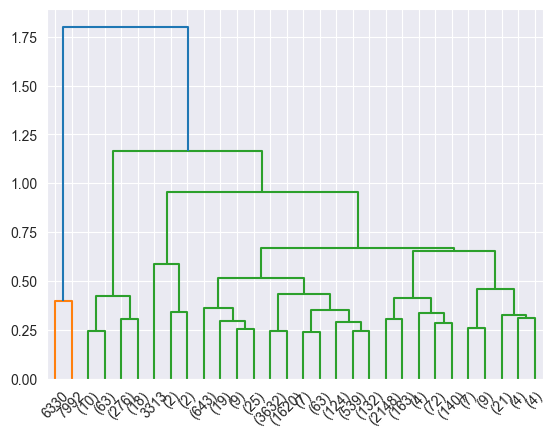

In [8]:
import numpy as np
import pandas as pd


from tqdm.notebook import tqdm
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pylab
import matplotlib.patches

import matplotlib.pyplot as plt


#from spicy.spatial.distance import plist
from scipy.spatial.distance import pdist, squareform

#from spicy.stats import mode
from scipy.stats import mode

#from spicy.cluster.hierarchy import linkage, dendogram
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

from sklearn.cluster import AgglomerativeClustering 


incidents = pd.read_csv("../data/new_incidents.csv", low_memory=False)

def drop_state(df):
    df = df[df['state'] == "Texas"]
    return df

Texas = drop_state(incidents)

Texas.info()

#selezione feature
selected_features = ['n_participants', 'n_involved', 'age_to_average', 'par_to_tot']
df_aux = Texas[selected_features]

#Normalization
scaler = MinMaxScaler()
df_norm = scaler.fit_transform(df_aux.to_numpy())
ndf = pd.DataFrame(df_norm, columns=df_aux.columns)

#fine

data_dist = pdist(df_norm, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [9]:
cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')  
cluster.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster.labels_))

0.8937616718981689


In [10]:
ndf['label'] = cluster.labels_

ndf.label.value_counts()

label
0    9757
1       2
Name: count, dtype: int64

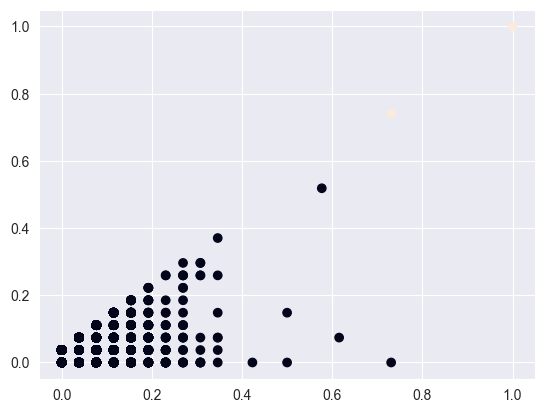

In [11]:
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster.labels_) 

In [12]:
values= df_aux['n_involved'].value_counts()
print(values)

n_involved
1     5576
0     2736
2     1111
3      224
4       74
5       17
7        8
6        6
8        3
10       1
14       1
27       1
20       1
Name: count, dtype: int64


In [13]:
outliers_row= df_aux[df_aux['n_involved'] >= 20]
print(outliers_row)

        n_participants  n_involved  age_to_average  par_to_tot
119144              27          27        1.390964    0.087948
144290              20          20        1.225373    0.077220


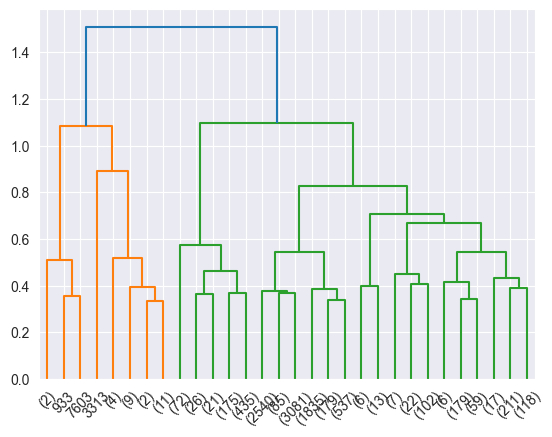

In [14]:
df_nout = df_aux.drop([119144, 144290])

#Normalization
scaler = MinMaxScaler()
df_norm_nout = scaler.fit_transform(df_nout.to_numpy())
ndf_nout = pd.DataFrame(df_norm_nout, columns=df_nout.columns)

#fine

data_dist = pdist(df_norm_nout, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=1.2, truncate_mode='lastp')

In [15]:
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')  
cluster.fit_predict(df_norm_nout)
print(silhouette_score(df_norm_nout, cluster.labels_))

0.5118144781222075


In [16]:
ndf_nout['label'] = cluster.labels_

ndf_nout.label.value_counts()

label
1    8997
2     729
0      31
Name: count, dtype: int64

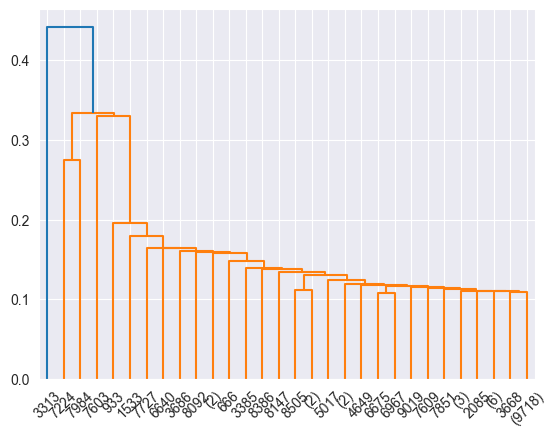

In [17]:
#data_dist = pdist(df_norm, metric = 'euclidean')
data_two_link= linkage(data_dist, method= 'single', metric='euclidean')
res2 = dendrogram(data_two_link, color_threshold=0.35, truncate_mode='lastp')

In [18]:
cluster2 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='single')  
cluster2.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster2.labels_))

0.8937616718981689


In [19]:
ndf['label'] = cluster2.labels_

ndf.label.value_counts()

label
1    9757
0       2
Name: count, dtype: int64

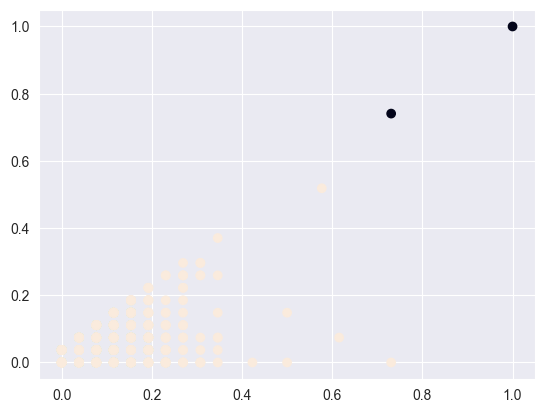

In [20]:
cluster2.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster2.labels_)

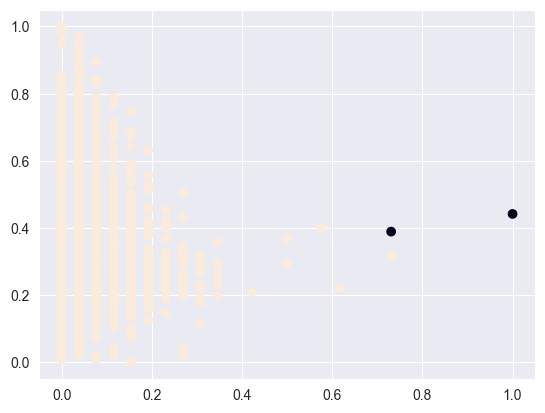

In [21]:
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster2.labels_)

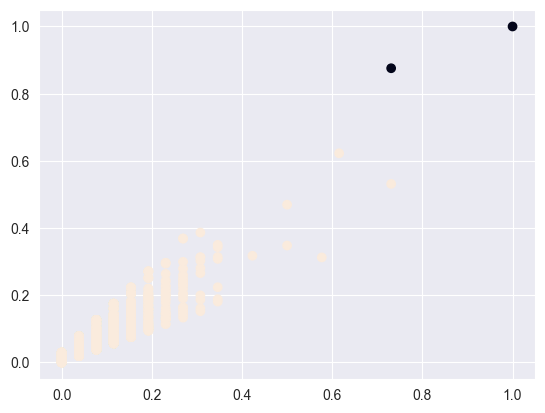

In [22]:
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster2.labels_)

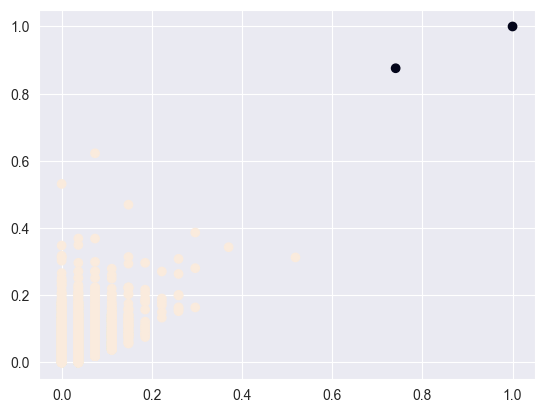

In [23]:
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster2.labels_)

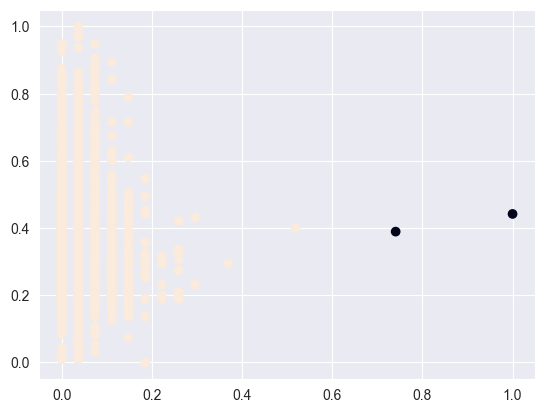

In [24]:
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster2.labels_)

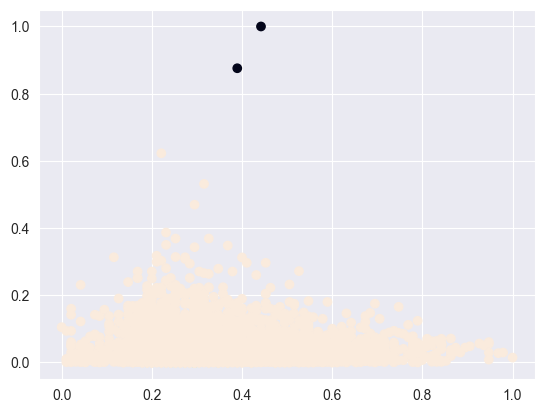

In [25]:
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster2.labels_)

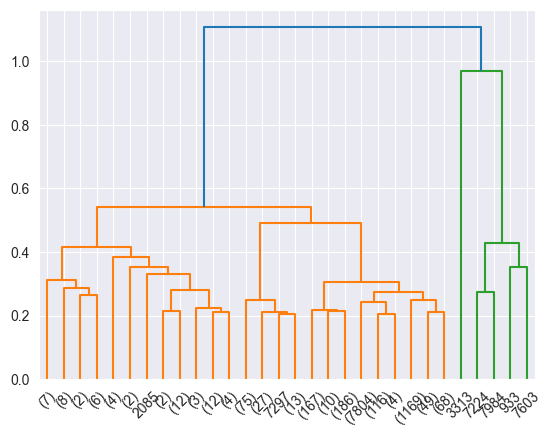

In [26]:
data_link_three = linkage(data_dist, method='average', metric='euclidean')
res3 = dendrogram(data_link_three, color_threshold=1.0, truncate_mode='lastp')

In [27]:
cluster3 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='average')  
cluster3.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster3.labels_))

0.8937616718981689


In [28]:
ndf['label'] = cluster3.labels_

ndf.label.value_counts()

label
0    9757
1       2
Name: count, dtype: int64

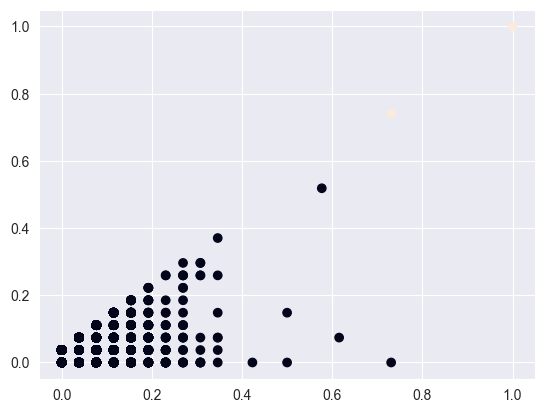

In [29]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster3.labels_)

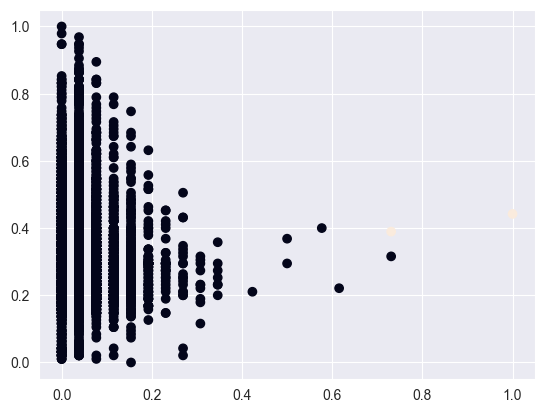

In [30]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster3.labels_)

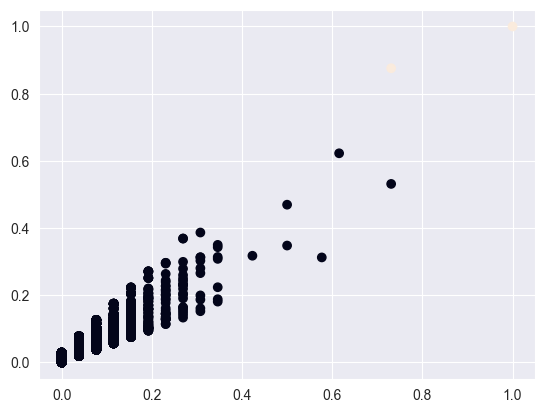

In [31]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster3.labels_)

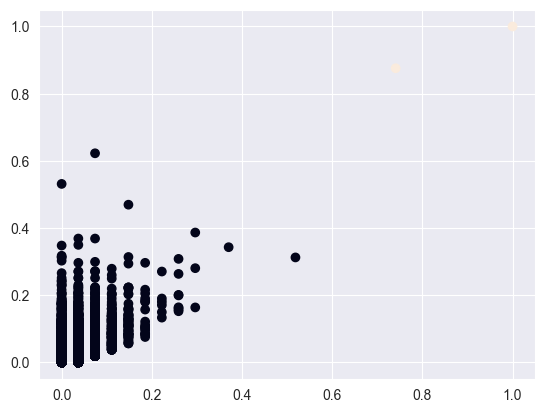

In [32]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster3.labels_)

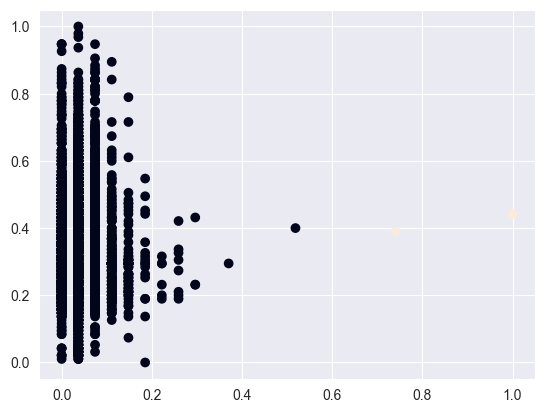

In [33]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster3.labels_)

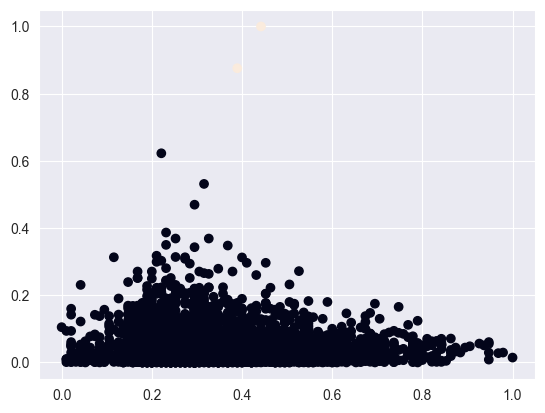

In [34]:
cluster3.fit_predict(df_norm)
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster3.labels_)

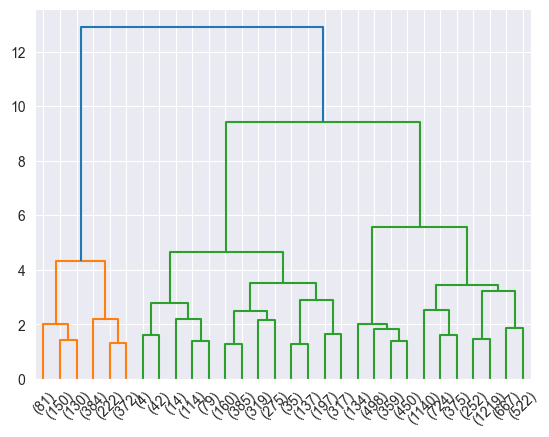

In [35]:
data_link_four = linkage(data_dist, method='ward', metric='euclidean')
res = dendrogram(data_link_four, color_threshold=10.0, truncate_mode='lastp')

In [36]:
cluster4 = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')  
cluster4.fit_predict(df_norm)
print(silhouette_score(df_norm, cluster4.labels_))

0.5252010649166792


In [37]:
ndf['label'] = cluster4.labels_

ndf.label.value_counts()

label
0    7971
1    1788
Name: count, dtype: int64

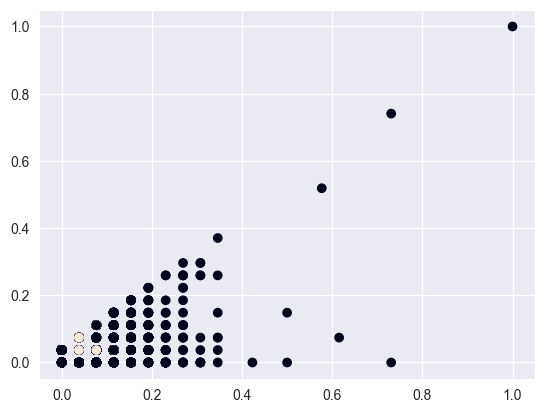

In [38]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['n_involved'], c=cluster4.labels_)

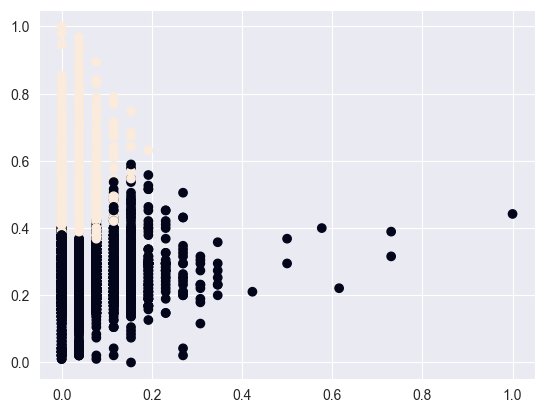

In [39]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['age_to_average'], c=cluster4.labels_)

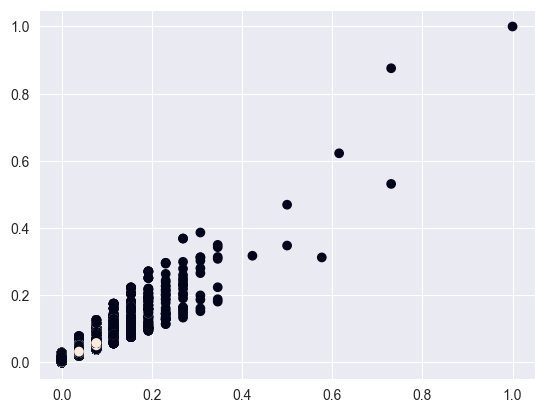

In [40]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_participants'], ndf['par_to_tot'], c=cluster4.labels_)

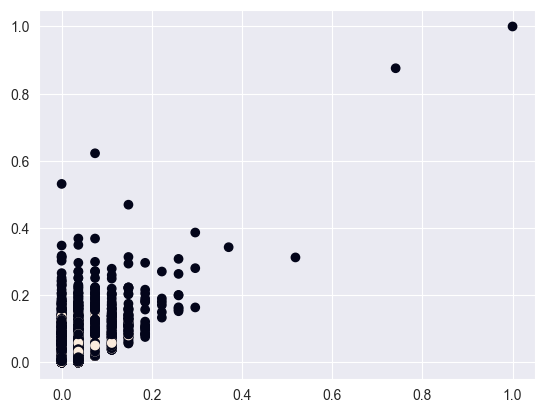

In [41]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['par_to_tot'], c=cluster4.labels_)

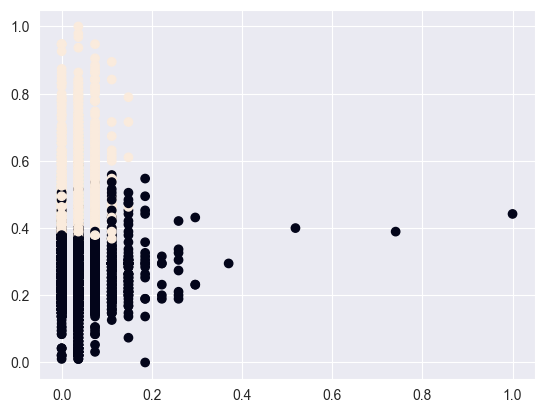

In [42]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['n_involved'], ndf['age_to_average'], c=cluster4.labels_)

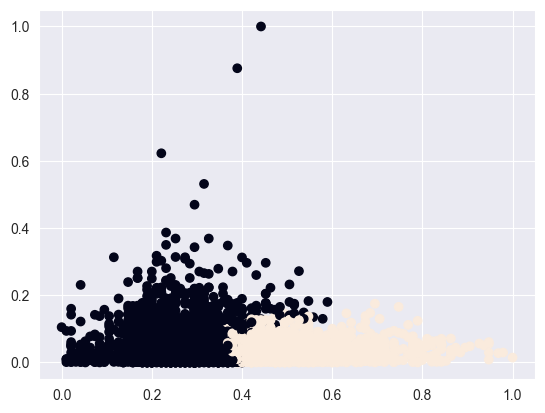

In [43]:
cluster4.fit_predict(df_norm)
plt.scatter(ndf['age_to_average'], ndf['par_to_tot'], c=cluster4.labels_)